In [20]:
##importing libraries
import numpy as np
import matplotlib.pyplot as plt


In [4]:
##input variables and expected outcome for the XOR gate
a=np.array([0, 0, 1, 1])
b=np.array([0, 1, 0, 1])
y_xor=np.array([[0, 1, 1, 0]])

In [5]:
##combining the total input array and one output array for the neural network
total_input=[]
total_input=[a, b]
total_input=np.array(total_input)
print(total_input)

[[0 0 1 1]
 [0 1 0 1]]


In [6]:
##sigmoid function defines the output of that node given an input or set of inputs
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [7]:
##number of neurons
input_neuron, hidden_neuron, output_neuron=2, 2, 1


In [8]:
##total number of training examples
samples=total_input.shape[1]

In [16]:
##learning rate
Lr=0.1

In [10]:
##seed () method is used to initialize the random number generator
np.random.seed(42)

In [13]:
# Initializing the weights for hidden and output layers

w1 = np.random.rand(hidden_neuron, input_neuron)
w2 = np.random.rand(output_neuron, hidden_neuron)

In [14]:
# Forward propagation
def forward_prop(w1, w2, x):
    z1 = np.dot(w1, x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1)
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

# Backward propagation
def back_prop(m, w1, w2, z1, a1, z2, a2, y):

    dz2 = a2-y
    dw2 = np.dot(dz2, a1.T)/m
    dz1 = np.dot(w2.T, dz2) * a1*(1-a1)
    dw1 = np.dot(dz1, total_input.T)/m
    dw1 = np.reshape(dw1, w1.shape)

    dw2 = np.reshape(dw2,w2.shape)
    return dz2,dw2,dz1,dw1

Text(0, 0.5, 'Loss value')

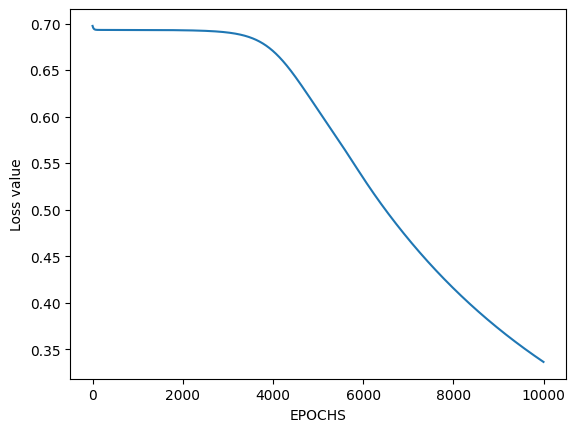

In [17]:
##start computing the loss accordingly by comparing it with the expected output
losses = []
iterations = 10000

for i in range(iterations):
    z1, a1, z2, a2 = forward_prop(w1, w2, total_input)
    loss = -(1/samples)*np.sum(y_xor*np.log(a2)+(1-y_xor)*np.log(1-a2))
    losses.append(loss)
    ##fine-tune the weights to receive the final result equivalent to the expected outcome
    da2, dw2, dz1, dw1 = back_prop(samples, w1, w2, z1, a1, z2, a2, y_xor)
    w2 = w2-Lr*dw2
    w1 = w1-Lr*dw1

# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [18]:
# We will perform the forward propagation by creating the predict function

def predict(w1,w2,input):
    z1, a1, z2, a2 = forward_prop(w1,w2,test)
    a2 = np.squeeze(a2)

    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")
    else:
        print("For input", [i[0] for i in input], "output is 0")

In [19]:
## testing the results predicted for each of the four possible cases and compare them with the expected outcomes of the XOR gate
test = np.array([[0],[0]])
predict(w1,w2,test)

test = np.array([[0],[1]])
predict(w1,w2,test)

test = np.array([[1],[0]])
predict(w1,w2,test)

test = np.array([[1],[1]])
predict(w1,w2,test)

For input [0, 0] output is 0
For input [0, 1] output is 1
For input [1, 0] output is 1
For input [1, 1] output is 0
